# Stochastic processes / random fields

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import binom

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Recap multivariate distributions

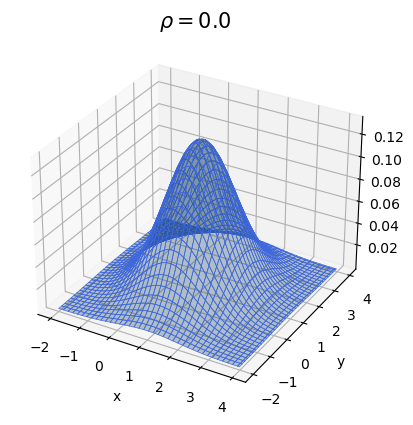

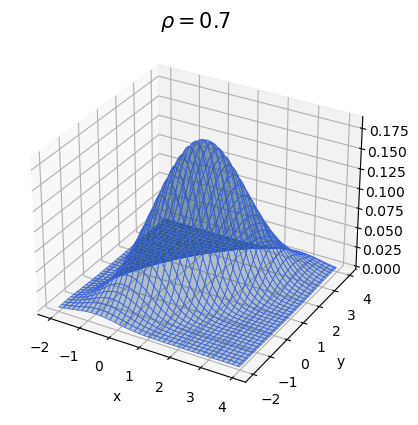

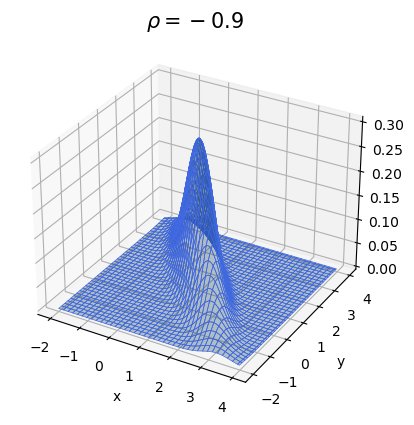

In [2]:
# Define a bivariate Gaussian and plot the pdf as contours for different values of the correlation coef.
from scipy.stats import multivariate_normal

x_values, y_values = np.mgrid[-2:4:.02, -2:4:.02]
pos = np.dstack((x_values, y_values))
# google the enumerate function if unknown
for i, rho in enumerate([0., 0.7, -0.9]):
    mu1, mu2 = 0., 1.
    sigma1, sigma2 = 1., 1.2
    bivariate_normal = multivariate_normal(
        mean=[mu2, mu2], cov=[[sigma1 ** 2, rho * sigma1 * sigma2], [rho * sigma1 * sigma2, sigma2 ** 2]])
    #ax[i].contourf(x_values, y_values, bivariate_normal.pdf(pos), cmap='Blues')
    ax = plt.figure().add_subplot(projection='3d')
    ax.plot_surface(x_values, y_values, bivariate_normal.pdf(pos), 
                    edgecolor='royalblue', lw=0.5, rstride=8, cstride=8, alpha=0.3)
    ax.set_title(r'$\rho = {}$'.format(rho), fontsize=15)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
#fig.tight_layout()
plt.show()

## White noise process

White noise: uncorrelated RVs with constant variance, e.g.:

$$X(t)\sim U[-1,1]$$

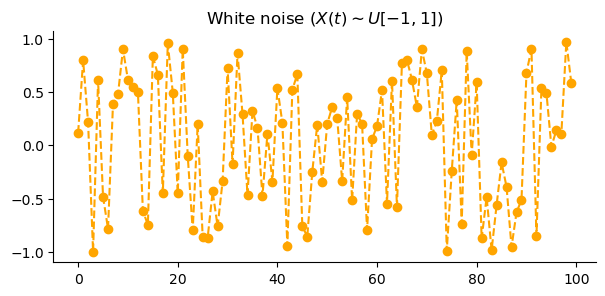

In [3]:
fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(np.arange(100), -1+2*np.random.rand(100), linestyle='--', marker='o', color='orange')
ax.spines[['right', 'top']].set_visible(False)
ax.set_title('White noise ($X(t)\sim U[-1,1]$)')
plt.show()

## Gaussian RP

Sample from a zero-mean Gaussian GP = sample from a multivariate Gaussian with zero mean and covariance $\Sigma$. Below $\Sigma$ is parameterized by $\theta$: $\theta \approx 0$ no correlation, $\theta \approx 1$ strong correlation between neightboring points.

In [4]:
def gp_sample_path(theta, n=50, seed=None):
    cov = np.eye(n)
    for k in range(1, n):
        cov += np.diag(np.exp(-theta*k)*np.ones(n-k), k=k)
        cov += np.diag(np.exp(-theta*k)*np.ones(n-k), k=-k)
    return multivariate_normal(cov=cov).rvs()

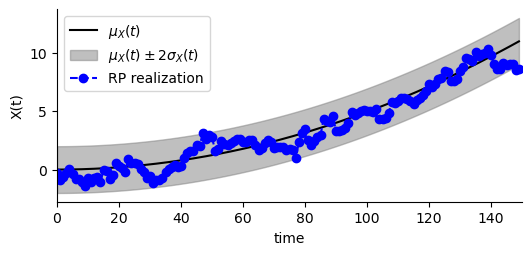

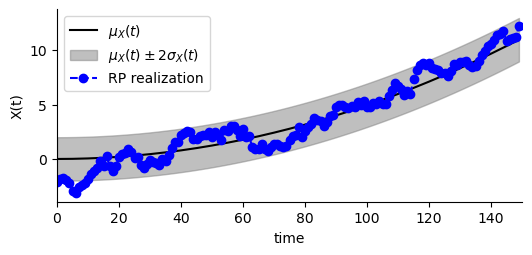

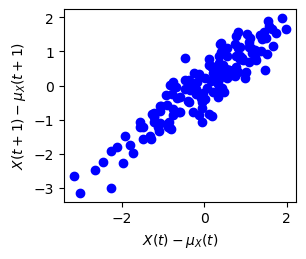

In [5]:
n=150
theta = 0.1

fig, ax = plt.subplots(figsize=(6, 2.5))
mean_func = (np.arange(n)/45)**2
rp = mean_func + gp_sample_path(theta,n)
ax.plot(np.arange(n), mean_func, linestyle='-', color='black', label='$\mu_X(t)$')
ax.fill_between(np.arange(n), mean_func-2., mean_func+2., linestyle='-', color='gray', alpha=0.5, 
                label='$\mu_X(t)\pm 2 \sigma_X(t)$')
ax.plot(np.arange(n), rp, linestyle='--', marker='o', color='blue', label='RP realization')
ax.set_xlabel('time')
ax.set_ylabel('X(t)')
ax.set_xlim([0, 150])
#ax.set_title('High correlation between adjacent of RVs')
ax.spines[['right', 'top']].set_visible(False)
ax.legend(loc='upper left')
plt.show()

fig, ax = plt.subplots(figsize=(6, 2.5))
mean_func = (np.arange(n)/45)**2
rp = mean_func + gp_sample_path(theta,n)
ax.plot(np.arange(n), mean_func, linestyle='-', color='black', label='$\mu_X(t)$')
ax.fill_between(np.arange(n), mean_func-2., mean_func+2., linestyle='-', color='gray', alpha=0.5, 
                label='$\mu_X(t)\pm 2 \sigma_X(t)$')
ax.plot(np.arange(n), rp, linestyle='--', marker='o', color='blue', label='RP realization')
ax.set_xlabel('time')
ax.set_ylabel('X(t)')
ax.set_xlim([0, 150])
#ax.set_title('High correlation between adjacent of RVs')
ax.spines[['right', 'top']].set_visible(False)
ax.legend(loc='upper left')
plt.show()

fig, ax = plt.subplots(figsize=(3, 2.5))
demeaned_rp = rp - mean_func
ax.scatter(demeaned_rp[:n-1],demeaned_rp[1:],color='blue')
ax.set_xlabel('$X(t)-\mu_X(t)$')
ax.set_ylabel('$X(t+1)-\mu_X(t+1)$')
plt.show()


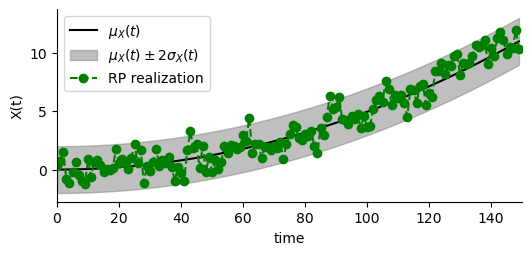

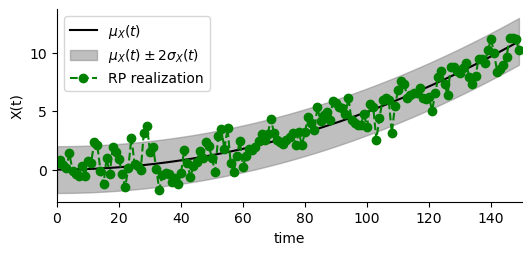

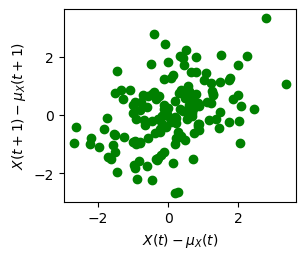

In [6]:
n=150
theta = 0.99

fig, ax = plt.subplots(figsize=(6, 2.5))
mean_func = (np.arange(n)/45)**2
rp = mean_func + gp_sample_path(theta,n)
ax.plot(np.arange(n), mean_func, linestyle='-', color='black', label='$\mu_X(t)$')
ax.fill_between(np.arange(n), mean_func-2., mean_func+2., linestyle='-', color='gray', alpha=0.5, 
                label='$\mu_X(t)\pm 2 \sigma_X(t)$')
ax.plot(np.arange(n), rp, linestyle='--', marker='o', color='green', label='RP realization')
ax.set_xlabel('time')
ax.set_ylabel('X(t)')
ax.set_xlim([0, 150])
#ax.set_title('High correlation between adjacent of RVs')
ax.spines[['right', 'top']].set_visible(False)
ax.legend(loc='upper left')
plt.show()

fig, ax = plt.subplots(figsize=(6, 2.5))
mean_func = (np.arange(n)/45)**2
rp = mean_func + gp_sample_path(theta,n)
ax.plot(np.arange(n), mean_func, linestyle='-', color='black', label='$\mu_X(t)$')
ax.fill_between(np.arange(n), mean_func-2., mean_func+2., linestyle='-', color='gray', alpha=0.5, 
                label='$\mu_X(t)\pm 2 \sigma_X(t)$')
ax.plot(np.arange(n), rp, linestyle='--', marker='o', color='green', label='RP realization')
ax.set_xlabel('time')
ax.set_ylabel('X(t)')
ax.set_xlim([0, 150])
#ax.set_title('High correlation between adjacent of RVs')
ax.spines[['right', 'top']].set_visible(False)
ax.legend(loc='upper left')
plt.show()

fig, ax = plt.subplots(figsize=(3, 2.5))
demeaned_rp = rp - mean_func
ax.scatter(demeaned_rp[:n-1],demeaned_rp[1:],color='green')
ax.set_xlabel('$X(t)-\mu_X(t)$')
ax.set_ylabel('$X(t+1)-\mu_X(t+1)$')
plt.show()


## Stationarity

Below I use the above GP process, make it non-stationary by having a time dependent mean, time dependent variance or time dependent correlation.

In [7]:
def gp_sample_path_non(scale_list, theta, n=50, seed=None):
    cov = np.zeros((n, n))
    for k in range(n):
        for kk in range(n):
            cov[k, kk] = np.exp(-theta[k]*theta[kk]*np.abs(k-kk))
    cov *= np.array(scale_list)[:, np.newaxis]
    cov *= np.array(scale_list)[np.newaxis, :]
    #print(np.diag(cov))
    return multivariate_normal(cov=cov).rvs()

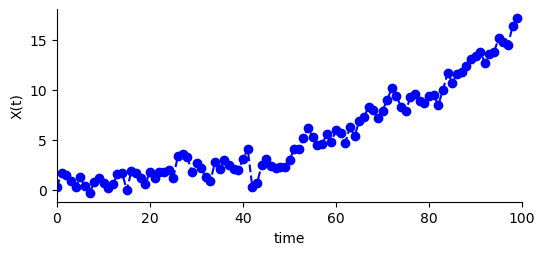

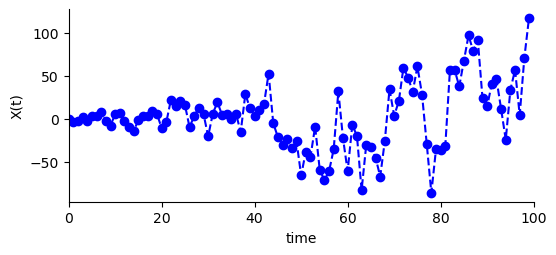

[0.1        0.1        0.1        0.1        0.1        0.1
 0.1        0.1        0.1        0.1        0.1        0.1
 0.1        0.1        0.1        0.1        0.1        0.1
 0.1        0.1        0.1        0.1        0.1        0.1
 0.1        0.1        0.1        0.1        0.1        0.1
 0.1        0.1        0.1        0.1        0.11111111 0.12222222
 0.13333333 0.14444444 0.15555556 0.16666667 0.17777778 0.18888889
 0.2        0.21111111 0.22222222 0.23333333 0.24444444 0.25555556
 0.26666667 0.27777778 0.28888889 0.3        0.31111111 0.32222222
 0.33333333 0.34444444 0.35555556 0.36666667 0.37777778 0.38888889
 0.4        0.41111111 0.42222222 0.43333333 0.44444444 0.45555556
 0.46666667 0.47777778 0.48888889 0.5        0.51111111 0.52222222
 0.53333333 0.54444444 0.55555556 0.56666667 0.57777778 0.58888889
 0.6        0.61111111 0.62222222 0.63333333 0.64444444 0.65555556
 0.66666667 0.67777778 0.68888889 0.7        0.71111111 0.72222222
 0.73333333 0.74444444 0.75555

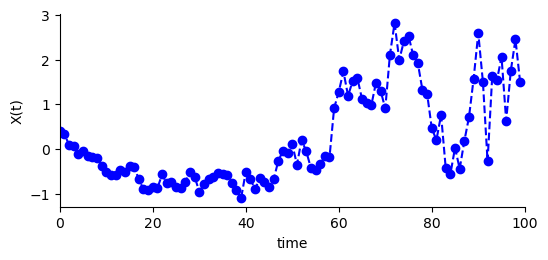

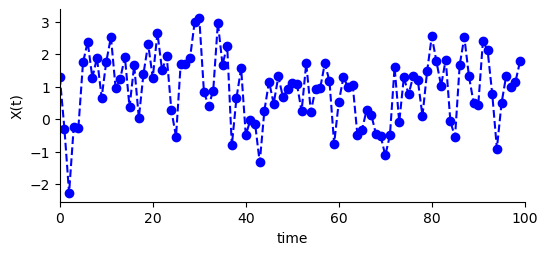

In [8]:
n=100

# Non-stationary: time-dependent mean
theta = 0.8*np.ones((n,))
scale_list=1*np.ones((n,))
fig, ax = plt.subplots(figsize=(6, 2.5))
mean_func = (np.arange(n)/25)**2
rp = mean_func + gp_sample_path_non(scale_list,theta,n)
#ax.plot(np.arange(n), mean_func, linestyle='-', color='black', label='$\mu_X(t)$')
#ax.fill_between(np.arange(n), mean_func-2.*scale_list, mean_func+2.*scale_list, linestyle='-', color='gray', 
#                alpha=0.5, label='$\mu_X(t)\pm 2 \sigma_X(t)$')
ax.plot(np.arange(n), rp, linestyle='--', marker='o', color='blue', label='RP realization')
ax.set_xlabel('time')
ax.set_ylabel('X(t)')
ax.set_xlim([0, 100])
#ax.set_title('High correlation between adjacent of RVs')
ax.spines[['right', 'top']].set_visible(False)
#ax.legend(loc='upper left')
plt.show()

# Non-stationary: time-dependent variance
scale_list = 1+(np.arange(n)/2)
fig, ax = plt.subplots(figsize=(6, 2.5))
mean_func = np.ones((n,))
rp = mean_func + gp_sample_path_non(scale_list,theta,n)
#ax.plot(np.arange(n), mean_func, linestyle='-', color='black', label='$\mu_X(t)$')
#ax.fill_between(np.arange(n), mean_func-2.*scale_list, mean_func+2.*scale_list, linestyle='-', color='gray', 
#                alpha=0.5, label='$\mu_X(t)\pm 2 \sigma_X(t)$')
ax.plot(np.arange(n), rp, linestyle='--', marker='o', color='blue', label='RP realization')
ax.set_xlabel('time')
ax.set_ylabel('X(t)')
ax.set_xlim([0, 100])
#ax.set_title('High correlation between adjacent of RVs')
ax.spines[['right', 'top']].set_visible(False)
#ax.legend(loc='upper left')
plt.show()

# Non-stationary: time-dependent correlation
scale_list = 1*np.ones((n,))
theta = 0.1*np.ones((n,))
theta[n//3:] = theta[n//3:]+np.arange(len(theta[n//3:]))/90
print(theta)
fig, ax = plt.subplots(figsize=(6, 2.5))
mean_func = np.ones((n,))
rp = mean_func + gp_sample_path_non(scale_list,theta,n)
#ax.plot(np.arange(n), mean_func, linestyle='-', color='black', label='$\mu_X(t)$')
#ax.fill_between(np.arange(n), mean_func-2.*scale_list, mean_func+2.*scale_list, linestyle='-', color='gray', 
#                alpha=0.5, label='$\mu_X(t)\pm 2 \sigma_X(t)$')
ax.plot(np.arange(n), rp, linestyle='--', marker='o', color='blue', label='RP realization')
ax.set_xlabel('time')
ax.set_ylabel('X(t)')
ax.set_xlim([0, 100])
#ax.set_title('High correlation between adjacent of RVs')
ax.spines[['right', 'top']].set_visible(False)
#ax.legend(loc='upper left')
plt.show()

# Stationary
scale_list = 1*np.ones((n,))
theta = 0.9*np.ones((n,))
fig, ax = plt.subplots(figsize=(6, 2.5))
mean_func = np.ones((n,))
rp = mean_func + gp_sample_path_non(scale_list,theta,n)
#ax.plot(np.arange(n), mean_func, linestyle='-', color='black', label='$\mu_X(t)$')
#ax.fill_between(np.arange(n), mean_func-2.*scale_list, mean_func+2.*scale_list, linestyle='-', color='gray', 
#                alpha=0.5, label='$\mu_X(t)\pm 2 \sigma_X(t)$')
ax.plot(np.arange(n), rp, linestyle='--', marker='o', color='blue', label='RP realization')
ax.set_xlabel('time')
ax.set_ylabel('X(t)')
ax.set_xlim([0, 100])
#ax.set_title('High correlation between adjacent of RVs')
ax.spines[['right', 'top']].set_visible(False)
#ax.legend(loc='upper left')
plt.show()


## Auto-correlation function

The auto-correlation functions shows the decay of correlation as distance increases between RVs.

For a stationary process ${X_1, X_2, \cdots}$, the auto-covariance function is:

$$ K_{XX}(\tau) = E[(X_{t+\tau}-\mu_X) (X_{t}-\mu_X)^T] $$

where $\mu_X$ is the process mean (constant for stationary process). The auto-correlation function is:

$$ R_{XX}(\tau) = E[X_{t+\tau} X_{t}^T] $$

and the normalized auto-correlation function is:

$$ \rho_{XX}(\tau) = \frac{K_{XX}(\tau)}{\sigma_X^2} $$

where $\sigma^2_X=K_{XX}(0)$ is the process variance (constant for stationary process).


Example of an auto-regressive process of order 1:

$$X_{k}=\theta X_{k-1} + \varepsilon$$

where $\varepsilon \sim N(0, 1)$. This process is zero-mean so $K_{XX}=R_{XX}$. The autocorrelation function for an AR model as above is $R_{XX}(\tau)=\theta^\tau R_{XX}(0)$ and $R_{XX}(0)=\frac{1}{1-\theta^2}$

In [9]:
# sample from an AR(1) process with a given theta value
def ar_sample_path(theta, n=50):
    x = np.zeros((n+10,))
    for i in range(n+10):
        x[i] = theta * x[i-1] + np.random.randn()
    return x[-n:]


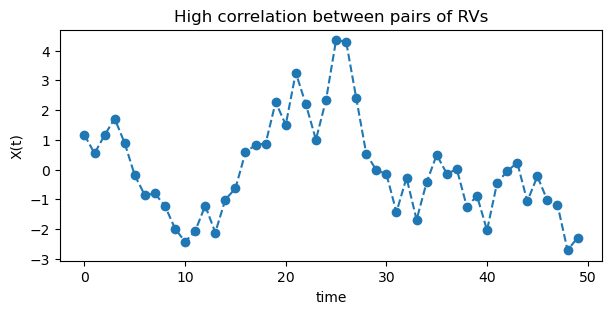

In [10]:
theta = 0.95

fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(np.arange(50), ar_sample_path(theta), linestyle='--', marker='o')
ax.set_xlabel('time')
ax.set_ylabel('X(t)')
ax.set_title('High correlation between pairs of RVs')
plt.show()


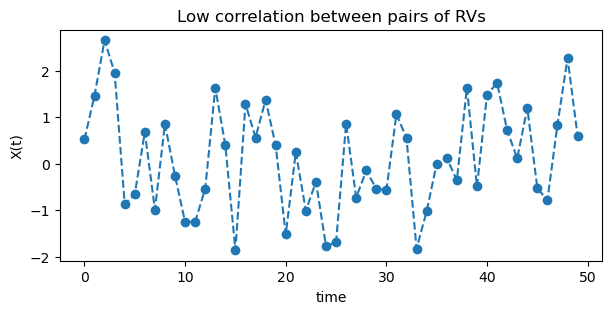

In [11]:
theta = 0.2

fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(np.arange(50), ar_sample_path(theta), linestyle='--', marker='o')
ax.set_xlabel('time')
ax.set_ylabel('X(t)')
ax.set_title('Low correlation between pairs of RVs')
plt.show()

In [12]:
# return the autocorrelation function
def compute_rxx(theta, normalized=False):
    taus = np.arange(50)
    rxx = np.zeros_like(taus, dtype=float)
    rxx[0] = 1 / (1-theta**2)
    for i in range(1, 50):
        rxx[i] = theta ** float(i) * rxx[0]
    if normalized:
        return taus, rxx / rxx[0]
    return taus, rxx


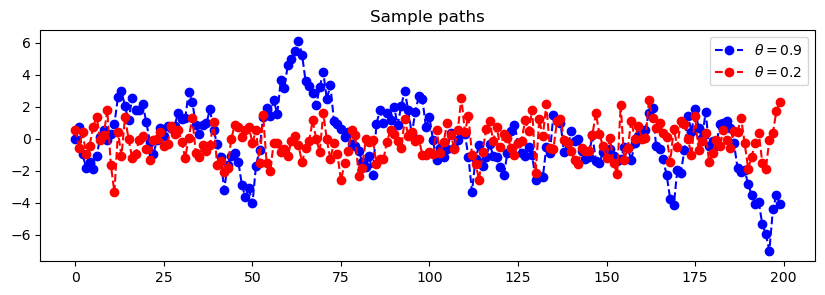

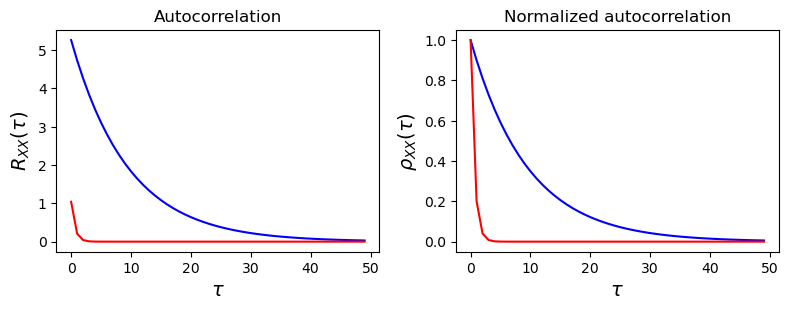

In [13]:

fig, ax = plt.subplots(figsize=(10, 3))
fig2, ax2 = plt.subplots(figsize=(8, 3), ncols=2)
for theta, color in zip([0.9, 0.2], ['blue', 'red']):
    n = 200
    ax.plot(np.arange(n), ar_sample_path(theta, n=n), linestyle='--', marker='o', color=color, 
            label=r'$\theta={}$'.format(theta))
    
    taus, rxx = compute_rxx(theta)
    ax2[0].plot(taus, rxx, color=color)
    taus, rxx = compute_rxx(theta, normalized=True)
    ax2[1].plot(taus, rxx, color=color)
    ax2[0].set_xlabel(r'$\tau$', fontsize=14)
    ax2[1].set_xlabel(r'$\tau$', fontsize=14)
    ax2[0].set_ylabel(r'$R_{XX}(\tau)$', fontsize=14)
    ax2[1].set_ylabel(r'$\rho_{XX}(\tau)$', fontsize=14)
    
ax.set_title('Sample paths')
fig2.tight_layout()
ax.legend()
ax2[0].set_title('Autocorrelation')
ax2[1].set_title('Normalized autocorrelation')

plt.show(fig)
plt.show(fig2)
